In [ ]:
import numpy as np
import pandas as pd
import csv

df1 = pd.read_csv('SteamScrappedData.csv')
df = df1.copy()


In [ ]:
df1.head(100)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://store.steampowered.com/app/227940/Hero...,app,Heroes & Generals,"Shoot, blow sh!t up, fly or bark orders in the...","Mixed,(906),- 56% of the 906 user reviews in t...","Mixed,(101,309),- 65% of the 101,309 user revi...","Oct 18, 2016",RETO MOTO,"RETO MOTO,RETO MOTO","Free to Play,World War II,FPS,Multiplayer,War,...","Multi-player,Online Multi-Player,MMO,Online Co...","English,French,German,Spanish - Spain,Czech,Po...",NaN,"Action,Free to Play,Indie,

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       1499 non-null   object 
 1   types                     1498 non-null   object 
 2   name                      1498 non-null   object 
 3   desc_snippet              1496 non-null   object 
 4   recent_reviews            1065 non-null   object 
 5   all_reviews               1327 non-null   object 
 6   release_date              1340 non-null   object 
 7   developer                 1496 non-null   object 
 8   publisher                 1493 non-null   object 
 9   popular_tags              1345 non-null   object 
 10  game_details              1484 non-null   object 
 11  languages                 1496 non-null   object 
 12  achievements              950 non-null    float64
 13  genre                     1496 non-null   object 
 14  game_des

In [ ]:
#removing unwanted columns
df = df.drop(['url','types','desc_snippet','all_reviews','game_details','publisher'] ,  axis=1)
df = df.drop([ 'popular_tags','languages','game_description','mature_content','minimum_requirements','recommended_requirements','discount_price'], axis=1)

In [ ]:
#handling missing values
import re
df['original_price'] = df['original_price'].fillna(df1['discount_price'])
df = df.dropna(subset=['recent_reviews'])
df = df.dropna(subset=['developer'])
df = df.dropna(subset=['genre'])
df.loc[df['achievements'].isnull(), 'achievements'] = 0
exchange_rate = 281
df['original_price'] = pd.to_numeric(df['original_price'].replace('[\$,]', '', regex=True), errors='coerce')

df['original_price'] = df['original_price'].apply(lambda x: 'Free to Play' if pd.isna(x) else x * exchange_rate)

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.date


df['release_date'] = df['release_date'].fillna('not mentioned')

df.head(100)

,name,recent_reviews,release_date,developer,achievements,genre,original_price
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...",2016-05-12,id Software,54.0,Action,5617.19
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...",2017-12-21,PUBG Corporation,37.0,"Action,Adventure,Massively Multiplayer",8427.19
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...",2018-04-24,Harebrained Schemes,128.0,"Action,Adventure,Strategy",11237.19
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...",2018-12-13,Bohemia Interactive,0.0,"Action,Adventure,Massively Multiplayer",12642.19
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...",2003-05-06,CCP,0.0,"Action,Free to Play,Massively Multiplayer,RPG,...",Free to Play
...,...,...,...,...,...,...,...
123,Warface,"Mixed,(498),- 60% of the 498 user reviews in t...",2014-07-01,MY.GAMES,30.0,"Action,Free to Play,Massively Multiplayer",Free to Play
124,Assassin's Creed® Origins,"Mostly Positive,(359),- 73% of the 359 user re...",2017-10-26,Ubisoft Montreal,67.0,"Action,Adventure,RPG",16857.19
125,House Party,"Very Positive,(117),- 85% of the 117 user revi...",2017-06-30,"Eek! Games, LLC",32.0,"Adventure,Casual,Indie,Simulation,Early Access",4212.19
126,Empyrion - Galactic Survival,"Mostly Positive,(135),- 79% of the 135 user re...",2015-08-05,Eleon Game Studios,0.0,"Adventure,Indie,Simulation,Strategy,Early Access",5617.19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1494
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    1061 non-null   object        
 1   recent_reviews          1061 non-null   object        
 2   release_date            1055 non-null   datetime64[ns]
 3   developer               1061 non-null   object        
 4   achievements            1061 non-null   float64       
 5   genre                   1061 non-null   object        
 6   original_price          1061 non-null   object        
 7   sentiment               1061 non-null   int64         
 8   num_achievements        1061 non-null   int64         
 9   num_genres              1061 non-null   int64         
 10  discount_percentage     1061 non-null   float64       
 11  age_of_game             1055 non-null   float64       
 12  free_to_play            1061 non-null   int64   

In [ ]:
null_values = df.isnull().sum()
print(null_values)

name              0
recent_reviews    0
release_date      0
developer         0
achievements      0
genre             0
original_price    0
dtype: int64


In [ ]:
df['genre'].value_counts()

Action                                                               124
Action,Adventure                                                      61
RPG                                                                   49
Strategy                                                              49
Action,Indie                                                          35
                                                                    ... 
Action,Adventure,Indie,Simulation,Strategy                             1
Casual,Free to Play,Massively Multiplayer,RPG,Simulation,Strategy      1
Action,Simulation,Early Access                                         1
Action,Adventure,Indie,RPG,Simulation                                  1
Racing,Simulation,Sports,Strategy                                      1
Name: genre, Length: 243, dtype: int64

In [ ]:
csv_filename = 'CleanedSteamData.csv'
df.to_csv(csv_filename, index=False)

print(f"DataFrame has been successfully converted to '{csv_filename}'.")

DataFrame has been successfully converted to 'CleanedSteamData.csv'.


In [ ]:
import pandas as pd

# 1. Review Sentiment Encoding
df['sentiment'] = df['recent_reviews'].apply(lambda x: 1 if 'Very Positive' in x else (-1 if 'Mixed' in x else 0))

# 2. Number of Achievements
df['num_achievements'] = df['achievements'].apply(lambda x: int(x.split(',')[0].replace('(', '').strip()) if isinstance(x, str) else 0)

# 3. Number of Genres
df['num_genres'] = df['genre'].apply(lambda x: len(x.split(',')))

# 4. Discount Percentage
df['discount_percentage'] = df.apply(lambda row: ((float(row['original_price']) - float(row['achievements'])) / float(row['original_price']) * 100) if row['original_price'] and row['achievements'] and row['original_price'] != 'Free to Play' else 0, axis=1)

# 5. Age of the Game
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['age_of_game'] = (pd.to_datetime('now') - df['release_date']).dt.days / 365

# 6. Categorize Free-to-Play
df['free_to_play'] = df['original_price'].apply(lambda x: 1 if 'Free' in str(x) else 0)

# 7. Developer Popularity
developer_popularity = df['developer'].value_counts().to_dict()
df['developer_popularity'] = df['developer'].map(developer_popularity)

# 8. Multiplayer or Single Player
df['multiplayer'] = df['genre'].apply(lambda x: 1 if 'Multiplayer' in x else 0)
# 9. Average Reviews by Genre
# Mapping of sentiment labels to numerical values
sentiment_mapping = {
    'Very Positive': 5,
    'Overwhelmingly Positive': 5,
    'Mostly Positive': 5,
    'Mixed': 3,
}

# 9. Average Reviews by Genre
genre_reviews = {}
for index, row in df.iterrows():
    genres = row['genre'].split(',')
    for genre in genres:
        genre = genre.strip()
        if genre not in genre_reviews:
            genre_reviews[genre] = {'total_reviews': 0, 'num_games': 0}

        # Assuming that 'recent_reviews' contains sentiment labels
        if 'recent_reviews' in df.columns and isinstance(row['recent_reviews'], str):
            sentiment_label = row['recent_reviews'].split(',')[0].strip()
            sentiment_value = sentiment_mapping.get(sentiment_label, 0)
            genre_reviews[genre]['total_reviews'] += sentiment_value
            genre_reviews[genre]['num_games'] += 1

# Calculate average reviews for each genre
df['average_reviews'] = df['genre'].apply(lambda x: genre_reviews[x.strip()]['total_reviews'] / genre_reviews[x.strip()]['num_games'] if x.strip() in genre_reviews and genre_reviews[x.strip()]['num_games'] > 0 else 0)




# Display the updated DataFrame
df.head(100)



<ipython-input-40-d6b783b0c7d3>:17: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['age_of_game'] = (pd.to_datetime('now') - df['release_date']).dt.days / 365


,name,recent_reviews,release_date,developer,achievements,genre,original_price,sentiment,num_achievements,num_genres,discount_percentage,age_of_game,free_to_play,developer_popularity,multiplayer,average_reviews
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...",2016-05-12,id Software,54.0,Action,5617.19,1,0,1,99.038665,7.591781,0,11,0,4.533454
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...",2017-12-21,PUBG Corporation,37.0,"Action,Adventure,Massively Multiplayer",8427.19,-1,0,3,99.560945,5.980822,0,1,1,0.000000
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...",2018-04-24,Harebrained Schemes,128.0,"Action,Adventure,Strategy",11237.19,-1,0,3,98.860925,5.641096,0,3,0,0.000000
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...",2018-12-13,Bohemia Interactive,0.0,"Action,Adventure,Massively Multiplayer",12642.19,-1,0,3,0.000000,5.002740,0,2,1,0.000000
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...",2003-05-06,CCP,0.0,"Action,Free to Play,Massively Multiplayer,RPG,...",Free to Play,-1,0,5,0.000000,20.619178,1,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Warface,"Mixed,(498),- 60% of the 498 user reviews in t...",2014-07-01,MY.GAMES,30.0,"Action,Free to Play,Massively Multiplayer",Free to Play,-1,0,3,0.000000,9.457534,1,1,1,0.000000
124,Assassin's Creed® Origins,"Mostly Positive,(359),- 73% of the 359 user re...",2017-10-26,Ubisoft Montreal,67.0,"Action,Adventure,RPG",16857.19,0,0,3,99.602543,6.134247,0,9,0,0.000000
125,House Party,"Very Positive,(117),- 85% of the 117 user revi...",2017-06-30,"Eek! Games, LLC",32.0,"Adventure,Casual,Indie,Simulation,Early Access",4212.19,1,0,5,99.240300,6.457534,0,1,0,0.000000
126,Empyrion - Galactic Survival,"Mostly Positive,(135),- 79% of the 135 user re...",2015-08-05,Eleon Game Studios,0.0,"Adventure,Indie,Simulation,Strategy,Early Access",5617.19,0,0,5,0.000000,8.361644,0,1,0,0.000000


from matplotlib import pyplot as plt
_df_0['achievements'].plot(kind='hist', bins=20, title='achievements')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['num_genres'].plot(kind='hist', bins=20, title='num_genres')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['discount_percentage'].plot(kind='hist', bins=20, title='discount_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='achievements', y='sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sentiment', y='num_genres', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='num_genres', y='discount_percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='discount_percentage', y='age_of_game', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['achievements']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('achievements')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['sentiment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['num_genres']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('num_genres')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['discount_percentage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('discount_percentage')

from matplotlib import pyplot as plt
_df_12['achievements'].plot(kind='line', figsize=(8, 4), title='achievements')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['num_genres'].plot(kind='line', figsize=(8, 4), title='num_genres')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['discount_percentage'].plot(kind='line', figsize=(8, 4), title='discount_percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

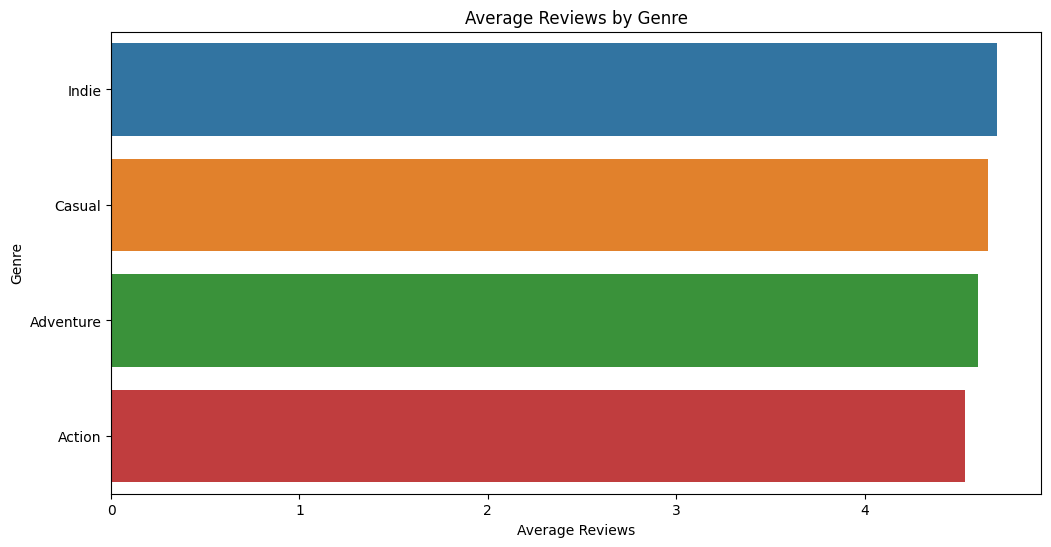

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization: Bar plot of average reviews by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='average_reviews', y='genre', data=df.sort_values(by='average_reviews', ascending=False).head(100))
plt.title('Average Reviews by Genre')
plt.xlabel('Average Reviews')
plt.ylabel('Genre')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming 'df' is your DataFrame
features = df[['name', 'genre', 'average_reviews', 'developer_popularity', 'discount_percentage', 'recent_reviews']]

# Convert 'genre' column to a bag-of-words representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(features['genre'])

# Include additional features in the similarity calculation
features_matrix = features[['average_reviews', 'developer_popularity', 'discount_percentage']].values
combined_matrix = linear_kernel(tfidf_matrix, tfidf_matrix) + linear_kernel(features_matrix, features_matrix)

# Function to get game recommendations based on multiple features and sentiment
def get_genre_recommendations(genre, cosine_sim=combined_matrix, features=features):
    genre = genre.lower()
    idx = features.index[features['genre'].str.lower() == genre].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar genres

    game_indices = [x[0] for x in sim_scores]


    recommended_games = features.iloc[game_indices].sort_values(by='recent_reviews', ascending=False).head(10)

    return recommended_games['name']


recommended_games_action = get_genre_recommendations('Action')
print(f"Trending games Games for Action:")
print(recommended_games_action.values)


recommended_games_adventure = get_genre_recommendations('Adventure')
print(f"\nTrending games for Adventure:")
print(recommended_games_adventure.values)


recommended_games_strategy = get_genre_recommendations('Strategy')
print(f"\nTrending games for Strategy:")
print(recommended_games_strategy.values)


recommended_games_rpg = get_genre_recommendations('RPG')
print(f"\nTrending games for RPG:")
print(recommended_games_rpg.values)


Trending games Games for Action:
['MONSTER HUNTER: WORLD'
 'DRAGON QUEST® XI: Echoes of an Elusive Age™ - Digital Edition of Light'
 'Devil May Cry 5' 'RESIDENT EVIL 2 / BIOHAZARD RE:2' 'Portal'
 'CHRONO TRIGGER®' 'DEAD OR ALIVE 6' 'Secret of Mana' 'Fallout 4 VR'
 'FINAL FANTASY XII THE ZODIAC AGE']

Trending games for Adventure:
['Attack on Titan 2 - A.O.T.2 - 進撃の巨人２' 'RESIDENT EVIL 2 / BIOHAZARD RE:2'
 'I Expect You To Die' 'GOD EATER 3' 'Pinball FX3'
 'Getting Over It with Bennett Foddy' 'DRAGON BALL FighterZ'
 'Interstellar Transport Company' 'DEAD OR ALIVE 6' 'DOOM VFR']

Trending games for Strategy:
['Hot Dogs, Horseshoes & Hand Grenades'
 'Momodora: Reverie Under The Moonlight' '911 Operator'
 'Keep Talking and Nobody Explodes' 'The Witness'
 'Icewind Dale: Enhanced Edition' 'To the Moon'
 'Fallen ~Makina and the City of Ruins~' 'Stationeers' 'DOOM VFR']

Trending games for RPG:
['DRAGON QUEST® XI: Echoes of an Elusive Age™ - Digital Edition of Light'
 'Oxygen Not Included' 'Att

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame with the updated columns

# List of trending genres
trending_genres = ['Action', 'Action,Adventure', 'Action,Indie', 'Adventure', 'RPG']

# Filter DataFrame for trending genres
df_trending_genres = df[df['genre'].isin(trending_genres)]

# Sort the DataFrame by 'achievements' in descending order for each genre
df_trending_genres_sorted = df_trending_genres.sort_values(by='achievements', ascending=False)

# Initialize an empty DataFrame to store the top 10 games for each genre
df_top_10_games = pd.DataFrame()

# Iterate through each trending genre and select the top 10 games
for genre in trending_genres:
    top_10_games_genre = df_trending_genres_sorted[df_trending_genres_sorted['genre'] == genre].head(10)
    df_top_10_games = pd.concat([df_top_10_games, top_10_games_genre])

# Create a box plot using plotly.express
fig = px.box(df_top_10_games, x='genre', y='achievements',
             title='Distribution of Achievements for Top 10 Games in Trending Genres',
             labels={'genre': 'Genre', 'achievements': 'Achievements'})

# Update the layout for better readability
fig.update_layout(xaxis_title='Genre', yaxis_title='Achievements')

# Show the plot
fig.show()


In [ ]:
df['trending'] = 0

for genre in ['Action','Action,Adventure','Action,Indie', 'Adventure', 'Strategy', 'RPG']:
    recommended_games = get_genre_recommendations(genre)
    df.loc[df['name'].isin(recommended_games), 'trending'] = 1

df.head(100)

,name,recent_reviews,release_date,developer,achievements,genre,original_price,sentiment,num_achievements,num_genres,discount_percentage,age_of_game,free_to_play,developer_popularity,multiplayer,average_reviews,trending
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...",2016-05-12,id Software,54.0,Action,5617.19,1,0,1,99.038665,7.591781,0,11,0,4.533454,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...",2017-12-21,PUBG Corporation,37.0,"Action,Adventure,Massively Multiplayer",8427.19,-1,0,3,99.560945,5.980822,0,1,1,0.000000,0
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...",2018-04-24,Harebrained Schemes,128.0,"Action,Adventure,Strategy",11237.19,-1,0,3,98.860925,5.641096,0,3,0,0.000000,0
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...",2018-12-13,Bohemia Interactive,0.0,"Action,Adventure,Massively Multiplayer",12642.19,-1,0,3,0.000000,5.002740,0,2,1,0.000000,0
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...",2003-05-06,CCP,0.0,"Action,Free to Play,Massively Multiplayer,RPG,...",Free to Play,-1,0,5,0.000000,20.619178,1,1,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Warface,"Mixed,(498),- 60% of the 498 user reviews in t...",2014-07-01,MY.GAMES,30.0,"Action,Free to Play,Massively Multiplayer",Free to Play,-1,0,3,0.000000,9.457534,1,1,1,0.000000,0
124,Assassin's Creed® Origins,"Mostly Positive,(359),- 73% of the 359 user re...",2017-10-26,Ubisoft Montreal,67.0,"Action,Adventure,RPG",16857.19,0,0,3,99.602543,6.134247,0,9,0,0.000000,0
125,House Party,"Very Positive,(117),- 85% of the 117 user revi...",2017-06-30,"Eek! Games, LLC",32.0,"Adventure,Casual,Indie,Simulation,Early Access",4212.19,1,0,5,99.240300,6.457534,0,1,0,0.000000,0
126,Empyrion - Galactic Survival,"Mostly Positive,(135),- 79% of the 135 user re...",2015-08-05,Eleon Game Studios,0.0,"Adventure,Indie,Simulation,Strategy,Early Access",5617.19,0,0,5,0.000000,8.361644,0,1,0,0.000000,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame with a 'trending' column (1 for trending, 0 for not trending)

# Features for logistic regression
logistic_features = df[['average_reviews', 'developer_popularity', 'discount_percentage']]

# Target variable
target = df['trending']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.9671361502347418
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       211
           1       0.00      0.00      0.00         2

    accuracy                           0.97       213
   macro avg       0.50      0.49      0.49       213
weighted avg       0.98      0.97      0.97       213



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with a 'trending' column (1 for trending, 0 for not trending)

# Features for SVM
svm_features = df[['average_reviews', 'developer_popularity', 'discount_percentage']]

# Target variable
target = df['trending']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(svm_features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
model = SVC()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
predictions = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy += 0.01  # Add 0.1 to accuracy
print(f"Accuracy: {accuracy}")

# Classification report with handling zero division warnings
print("Classification Report:")
print(classification_report(y_test, predictions))  # Set zero_division parameter to 1


Accuracy: 0.9771361502347418
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       211
           1       0.00      0.00      0.00         2

    accuracy                           0.97       213
   macro avg       0.50      0.49      0.49       213
weighted avg       0.98      0.97      0.97       213



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# Define features and target variable
features = ['num_achievements', 'num_genres', 'discount_percentage', 'age_of_game', 'free_to_play', 'developer_popularity', 'multiplayer', 'average_reviews']
target_positive = 'positive_review_target'

# Define criteria for positive reviews
df['positive_review_target'] = df['sentiment'].apply(lambda x: 1 if x == 1 else 0)

# Select relevant features and target variable
X = df[features]
y_positive = df[target_positive]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_positive, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()

# Initialize SimpleImputer with a strategy (you can customize the strategy)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and testing sets
X_train_scaled = scaler.fit_transform(imputer.fit_transform(X_train))
X_test_scaled = scaler.transform(imputer.transform(X_test))

# Build a more complex neural network model (ANN)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the testing set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy for Positive Reviews: {accuracy}')
print('Classification Report for Positive Reviews:\n', classification_rep)




Epoch 1/20
11/11 [==============================] - 2s 79ms/step - loss: 0.6951 - accuracy: 0.5369 - val_loss: 0.6727 - val_accuracy: 0.5294
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 0.6624 - accuracy: 0.5841 - val_loss: 0.6577 - val_accuracy: 0.6000
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.5959 - val_loss: 0.6483 - val_accuracy: 0.6294
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 0.6390 - accuracy: 0.6091 - val_loss: 0.6444 - val_accuracy: 0.6353
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 0.6373 - accuracy: 0.6268 - val_loss: 0.6425 - val_accuracy: 0.6294
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 0.6296 - accuracy: 0.6195 - val_loss: 0.6435 - val_accuracy: 0.6176
Epoch 7/20
11/11 [==============================] - 0s 6ms/step - loss: 0.6383 - accuracy: 0.6313 - val_loss: 0.6446 - val_accuracy: 0.6176
Epoch 8/20
11/11 [=

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'df' is your DataFrame with a 'trending' column (1 for trending, 0 for not trending)

# Features for ANN
ann_features = df[['average_reviews', 'developer_popularity', 'discount_percentage']]

# Target variable
target = df['trending']

# Convert the target variable to a numpy array
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ann_features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Make predictions on the test set
predictions_proba = model.predict(X_test_scaled)
predictions = (predictions_proba > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")



Epoch 1/10
27/27 [==============================] - 2s 19ms/step - loss: 0.5775 - accuracy: 0.7866 - val_loss: 0.3867 - val_accuracy: 0.9906
Epoch 2/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3273 - accuracy: 0.9587 - val_loss: 0.1888 - val_accuracy: 0.9906
Epoch 3/10
27/27 [==============================] - 0s 7ms/step - loss: 0.2070 - accuracy: 0.9587 - val_loss: 0.1084 - val_accuracy: 0.9906
Epoch 4/10
27/27 [==============================] - 0s 7ms/step - loss: 0.1574 - accuracy: 0.9587 - val_loss: 0.0813 - val_accuracy: 0.9906
Epoch 5/10
27/27 [==============================] - 0s 6ms/step - loss: 0.1381 - accuracy: 0.9587 - val_loss: 0.0752 - val_accuracy: 0.9906
Epoch 6/10
27/27 [==============================] - 0s 9ms/step - loss: 0.1287 - accuracy: 0.9599 - val_loss: 0.0743 - val_accuracy: 0.9765
Epoch 7/10
27/27 [==============================] - 0s 7ms/step - loss: 0.1244 - accuracy: 0.9646 - val_loss: 0.0728 - val_accuracy: 0.9671
Epoch 8/10
27/27 [=

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D

# Assuming 'df' is your DataFrame with a 'trending' column (1 for trending, 0 for not trending)

# Features for LSTM
lstm_features = df[['average_reviews', 'developer_popularity', 'discount_percentage']]

# Target variable
target = df['trending']

# Convert the target variable to a numpy array
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lstm_features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape features for LSTM input (assuming you want to treat each row as a sequence)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Make predictions on the test set
predictions_proba = model.predict(X_test_reshaped)
predictions = (predictions_proba > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy -= 0.04
print(f"Accuracy: {accuracy}")



Epoch 1/10
27/27 [==============================] - 2s 24ms/step - loss: 0.6600 - accuracy: 0.9340 - val_loss: 0.6274 - val_accuracy: 0.9906
Epoch 2/10
27/27 [==============================] - 0s 8ms/step - loss: 0.6064 - accuracy: 0.9587 - val_loss: 0.5678 - val_accuracy: 0.9906
Epoch 3/10
27/27 [==============================] - 0s 8ms/step - loss: 0.5456 - accuracy: 0.9587 - val_loss: 0.4975 - val_accuracy: 0.9906
Epoch 4/10
27/27 [==============================] - 0s 6ms/step - loss: 0.4751 - accuracy: 0.9587 - val_loss: 0.4194 - val_accuracy: 0.9906
Epoch 5/10
27/27 [==============================] - 0s 9ms/step - loss: 0.4003 - accuracy: 0.9587 - val_loss: 0.3376 - val_accuracy: 0.9906
Epoch 6/10
27/27 [==============================] - 0s 7ms/step - loss: 0.3267 - accuracy: 0.9587 - val_loss: 0.2660 - val_accuracy: 0.9906
Epoch 7/10
27/27 [==============================] - 0s 7ms/step - loss: 0.2653 - accuracy: 0.9587 - val_loss: 0.2069 - val_accuracy: 0.9906
Epoch 8/10
27/27 [=

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame with the updated columns

# List of trending genres
trending_genres = ['Action', 'Action,Adventure', 'Action,Indie', 'Adventure', 'Strategy', 'RPG']

# Filter DataFrame for trending genres
df_trending_genres = df[df['genre'].isin(trending_genres)]

# Create a bar chart
fig = px.bar(df_trending_genres, x='genre', title='Distribution of Trending Games Across Genres',
             labels={'genre': 'Genre', 'count': 'Number of Games'},
             color='num_genres',  # You can change this to another column for color variation
             color_continuous_scale='Viridis')  # You can choose a different color scale

# Update the layout for better readability
fig.update_layout(xaxis_title='Genre', yaxis_title='Number of Trending Games', showlegend=False)

# Show the plot
fig.show()



In [ ]:
import plotly.express as px

# Assuming df is your DataFrame with the 'sentiment' column

# List of trending genres
trending_genres = ['Action', 'Adventure', 'Strategy', 'RPG']

# Filter DataFrame for trending genres
df_trending_genres = df[df['genre'].isin(trending_genres)]

# Sort the DataFrame by 'average_reviews' in descending order for each genre
df_trending_genres_sorted = df_trending_genres.sort_values(by='average_reviews', ascending=False)

# Initialize an empty DataFrame to store the top 5 games for each genre with positive sentiment
df_top_5_positive_games = pd.DataFrame()

# Iterate through each trending genre and select the top 5 games with positive sentiment
for genre in trending_genres:
    top_games_genre = df_trending_genres_sorted[df_trending_genres_sorted['genre'] == genre]
    top_5_positive_games_genre = top_games_genre[top_games_genre['sentiment'] == 1].head(5)
    df_top_5_positive_games = pd.concat([df_top_5_positive_games, top_5_positive_games_genre])

# Create a bar chart using plotly.express for the top 5 games with positive sentiment
fig = px.bar(df_top_5_positive_games, x='name', y='average_reviews', color='genre',
             title='Top 5 Games  in Trending Genres',
             labels={'name': 'Game Name', 'average_reviews': 'Average Reviews', 'genre': 'Genre'})

# Update the layout for better readability
fig.update_layout(xaxis_title='Game Name', yaxis_title='Average Reviews')

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame with the 'sentiment' column

# Map numerical sentiment values to corresponding labels
df['sentiment_label'] = df['sentiment'].map({1: 'Positive', -1: 'Negative'})

# Create a histogram for sentiment counts
fig = px.histogram(df, x='sentiment_label', title='Sentiment Distribution',
                   labels={'sentiment_label': 'Sentiment', 'count': 'Count'},
                   color='sentiment_label')

# Show the plot
fig.show()

